In [1]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import *
from keras.datasets import mnist
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score
from tensorflow.keras.metrics import * 
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras import layers, models

# Implementing CNN Architecture

## Le Net 5

We will begin with The-NET5 as our first model to use. It's composed of 3 layers of convolution, 2 average pooling layers and fully connected part. The following image correspand to description of every layer, the feature map dimensions, the number of dimensions and the activation function used.

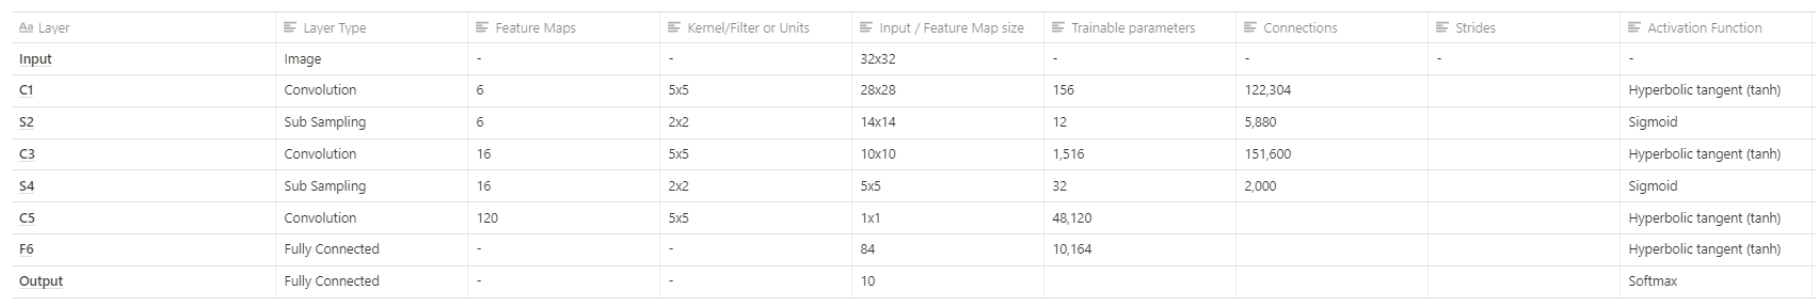

### mnsit dataset

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [71]:
lenet_5_model = keras.models.Sequential([
    layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28, 28, 1), padding='same'), #C1
    layers.AveragePooling2D(), #S2
    layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    layers.AveragePooling2D(), #S4
    layers.Flatten(), #Flatten
    layers.Dense(120, activation='tanh'), #C5
    layers.Dense(84, activation='tanh'), #F6
    layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

As we seen the description of our model, we applied the The-net5 composed of 8 hidden layers like said in the beginning. We found 61706 parameters to use. For the optimazation algorithm we will use **ADAM**. For the loss function, we will use **categorical_crossentropy**

In [72]:
lenet_5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = lenet_5_model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY))

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1533 - accuracy: 0.9535 - val_loss: 0.0580 - val_accuracy: 0.9809
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0586 - val_accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0457 - val_accuracy: 0.9855


In [74]:
acc = lenet_5_model.evaluate(testX, testY, verbose=0)
print("The model accurancy is ",acc[1]*100,"%")

The model accurancy is  98.54999780654907 %


In [75]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's loss")

    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

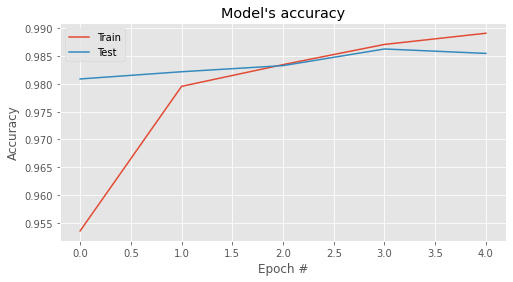

In [76]:
plot_accuracy(history)

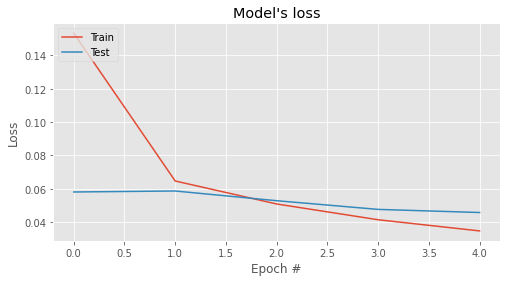

In [77]:
plot_loss(history)

#### Interpretation

As we see, with mnist dataset we find an high accuracy and low losses. Therefor, our model works well.
Plotting the accuracy over epochs shows us the we highlight the fact of having  a good test performance.

### faces

In [78]:
def generate_data(data,target,test_size):
  '''
This function help us to shift, split into train and test and retype the data for a later processing
  '''
  tf.random.set_seed(7)
  X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=7,test_size=test_size)
  X_train = np.array(X_train)
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  X_test = np.array(X_test)
  return X_train, X_test, y_train, y_test

We add some reseize to the image like some sort of data augmentation. This will help us reduce the risk of having an overfitting.

In [ ]:
def resize_images(images):
  imgs_resized = []
  for image in images:
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    imgs_resized.append(tf.image.resize(image, (227,227)))
  return imgs_resized

In [ ]:
facesData = fetch_olivetti_faces()
faces_shape = int(facesData.data.shape[1]**(0.5))
faces_labels_count = len(np.unique(facesData.target))
print("faces_labels_count = ",faces_labels_count)
# Reshape images to face shape
faceData_data_resh= facesData.data.reshape(facesData.data.shape[0],faces_shape, faces_shape,1)
faceData_data_resh.shape
# Split and shuffle
X_train_faces, X_test_faces, y_train_faces, y_test_faces = generate_data(faceData_data_resh, facesData.target,0.3)
print("X_train_face shape = ",X_train_faces.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
faces_labels_count =  40
faceData_data_resh shape =  (400, 64, 64, 1)
X_train_face shape =  (280, 64, 64, 1)


In [ ]:
resized_faces_train = np.array(resize_images(X_train_faces))
print(resized_faces_train.shape)

(280, 227, 227, 1)


In [ ]:
# Data Augmentation
datagen_face = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1
            )
datagen_face.fit(X_train_faces)
train_generator_faces = datagen_face.flow(X_train_faces, y_train_faces)
test_generator_faces = ImageDataGenerator().flow(X_test_faces, y_test_faces)

In [ ]:

lenet_5_model = Sequential()
lenet_5_model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(64,64,1)))
lenet_5_model.add(AvgPool2D(strides=2))
lenet_5_model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
lenet_5_model.add(AvgPool2D(strides=2))
lenet_5_model.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='tanh'))
lenet_5_model.add(Flatten())
lenet_5_model.add(Dense(84, activation='tanh'))
lenet_5_model.add(Dense(faces_labels_count, activation='softmax'))

In [ ]:
lenet_5_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

like before, we will use the same model, juste we will adjust to the data size only. 

In [ ]:
lenet_5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 32, 32, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 14, 14, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 120)       48120     
                                                                 
 flatten_3 (Flatten)         (None, 12000)            

In [ ]:
history=lenet_5_model.fit(train_generator_faces, epochs=70,validation_data=test_generator_faces)

Epoch 1/70
9/9 [==============================] - 2s 244ms/step - loss: 0.2897 - accuracy: 0.9250 - val_loss: 0.1867 - val_accuracy: 0.9250
Epoch 2/70
9/9 [==============================] - 2s 232ms/step - loss: 0.2671 - accuracy: 0.9500 - val_loss: 0.2872 - val_accuracy: 0.9167
Epoch 3/70
9/9 [==============================] - 2s 233ms/step - loss: 0.3080 - accuracy: 0.9214 - val_loss: 0.2135 - val_accuracy: 0.9333
Epoch 4/70
9/9 [==============================] - 2s 237ms/step - loss: 0.2592 - accuracy: 0.9393 - val_loss: 0.1883 - val_accuracy: 0.9417
Epoch 5/70
9/9 [==============================] - 2s 235ms/step - loss: 0.2705 - accuracy: 0.9321 - val_loss: 0.1706 - val_accuracy: 0.9583
Epoch 6/70
9/9 [==============================] - 3s 304ms/step - loss: 0.2674 - accuracy: 0.9286 - val_loss: 0.2107 - val_accuracy: 0.9417
Epoch 7/70
9/9 [==============================] - 1s 160ms/step - loss: 0.2477 - accuracy: 0.9500 - val_loss: 0.1995 - val_accuracy: 0.9417
Epoch 8/70
9/9 [====

In [ ]:
y=np.argmax(lenet_5_model.predict(X_test_faces),axis=1)
acc = precision_score(y_test_faces,y,average='weighted')
print("The model accurancy is ",acc*100,"%")

The model accurancy is  96.66666666666667 %


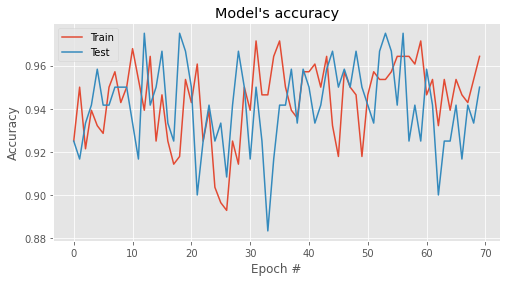

In [ ]:
plot_accuracy(history)

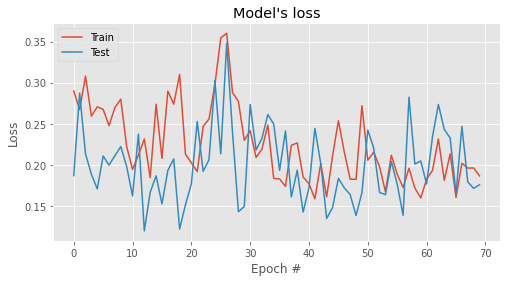

In [ ]:
plot_loss(history)

Interpretation:

The above pictures show that we have a flucatued behaviour in our training and test performance. This is due to the data augmentation that have been made to the data.

In term of performance, we obtain globally a good one. We see that we have 96% accuracy on our test set. and based on the curve ploted we see that obtain an accuracy between 88% and 97%. In contrast, we obtain a loss between 15% and 30%

## VGG

In this part, we will try to use the VGG-NET model. To explain quickly, we define a block. A block is composed of n convolution layer and max pooling layer. The vgg have many varient. in our case, we use The VGG-16 composed of 5 blocks; The first two are have 2 convolutional layers. The last three have 3 instead. This all is followed by a fully connected part. 
The following pictures summarize what we say.

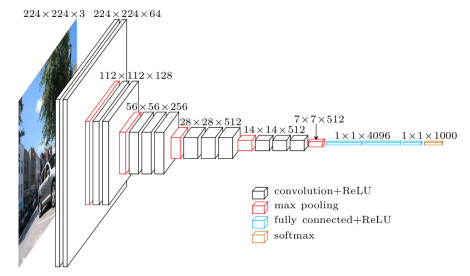

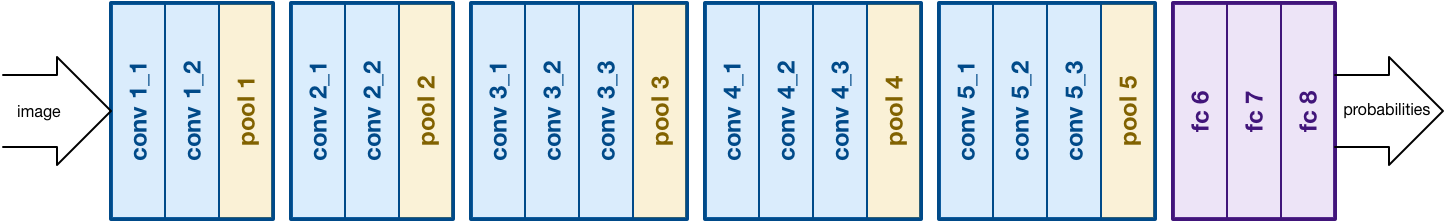

In [79]:
faces = fetch_olivetti_faces() 
X = faces['images']
y = faces['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
train_labels = to_categorical(y_train, num_classes=40)
test_labels = to_categorical(y_test, num_classes=40)
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train = X_train.reshape(-1, 64,64,3)
X_test= X_test.reshape (-1,64,64,3)

For samplicity, we will use a padding of same to reduce image size and make training quicker.

In [80]:
vgg_16_model = Sequential()
vgg_16_model.add(Conv2D(input_shape=(64,64,3) ,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg_16_model.add(Flatten())
vgg_16_model.add(Dense(units=4096,activation="relu"))
vgg_16_model.add(Dense(units=4096,activation="relu"))
vgg_16_model.add(Dense(units=40, activation="softmax"))

In [ ]:
print(vgg_16_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_63 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                 

In [81]:
vgg_16_model.compile(loss ='categorical_crossentropy', optimizer='rmsprop', metrics =['accuracy',Precision(),Recall()])
vgg_16_model.fit (X_train, train_labels, epochs=15)

Epoch 1/15
10/10 [==============================] - 54s 5s/step - loss: 4053.9680 - accuracy: 0.0219 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 52s 5s/step - loss: 3.6905 - accuracy: 0.0125 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 3/15
10/10 [==============================] - 52s 5s/step - loss: 3.6886 - accuracy: 0.0219 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 4/15
10/10 [==============================] - 52s 5s/step - loss: 3.6938 - accuracy: 0.0344 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 5/15
10/10 [==============================] - 52s 5s/step - loss: 3.6952 - accuracy: 0.0312 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 6/15
10/10 [==============================] - 52s 5s/step - loss: 3.6860 - accuracy: 0.0281 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 7/15
10/10 [==============================] - 52s 5s/step - loss: 3.6846 - accuracy: 0.0312 - precision_5: 0.

In [83]:
eval=vgg_16_model.evaluate(X_test,test_labels)

3/3 [==============================] - 3s 925ms/step - loss: 3.7774 - accuracy: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00


# Pretrained Model

In this part, we will use 2 pretrained algorithms form keras toolbox for more powerful models. We will redo our VGG16 and then pass to Resnet.

In [30]:
data=fetch_olivetti_faces()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_labels = to_categorical(y_train, num_classes=40)
test_labels = to_categorical(y_test, num_classes=40)
X_train = X_train.reshape((X_train.shape[0], 64, 64, 1))
X_test=X_test.reshape((X_test.shape[0],64,64,1))

In [31]:
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train = X_train.reshape(-1, 64,64,3)
X_test= X_test.reshape (-1,64,64,3)

In [47]:
input_layer=layers.Input(shape=(64,64,3))
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=model_vgg16.output
flatten=layers.Flatten()(last_layer) 

# Add output layer with 40 neurons
output_layer=layers.Dense(40,activation='softmax')(flatten)
model=models.Model(inputs=input_layer,outputs=output_layer)
for layer in model.layers[:-1]:
    layer.trainable=False

In [48]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])


In [50]:
history=model.fit (X_train, train_labels, epochs=5) 

Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 3.6538 - accuracy: 0.0844 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/5
10/10 [==============================] - 12s 1s/step - loss: 2.8882 - accuracy: 0.4062 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 12s 1s/step - loss: 2.3127 - accuracy: 0.7375 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 1.8717 - accuracy: 0.8313 - precision_1: 1.0000 - recall_1: 0.0219
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 1.5257 - accuracy: 0.9031 - precision_1: 1.0000 - recall_1: 0.0688


In [51]:
model.evaluate(X_test,test_labels)

3/3 [==============================] - 3s 882ms/step - loss: 1.6786 - accuracy: 0.8000 - precision_1: 1.0000 - recall_1: 0.1000


[1.6785995960235596, 0.800000011920929, 1.0, 0.10000000149011612]

As we see, we obtain a much better performance in term  of test. An accuracy of 80% with high precision and low recall.
Recall is TP/(TP+FN). So a low recall means we have less true positive value then false negative. In contrast we have a 100% precision that means that the False possitive value is 0

## Resnet

In [62]:
data=fetch_olivetti_faces()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_labels = to_categorical(y_train, num_classes=40)
test_labels = to_categorical(y_test, num_classes=40)
X_train = X_train.reshape((X_train.shape[0], 64, 64, 1))
X_test=X_test.reshape((X_test.shape[0],64,64,1))

In [63]:
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train = X_train.reshape(-1, 64,64,3)
X_test= X_test.reshape (-1,64,64,3)

In [64]:
model = keras.Sequential()
base_model = keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=(64, 64, 3))
for layer in base_model.layers[:-2]:
    layer.trainable = False

model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40, activation='softmax'))

In [57]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 40)                327720    
                                                                 
Total params: 58,659,368
Trainable params: 331,816
Non-trainable params: 58,327,552
_________________________________________________________________


In [65]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['accuracy',Precision(),Recall()])


In [66]:
history=model.fit (X_train, train_labels, epochs=8) 

Epoch 1/8
10/10 [==============================] - 19s 990ms/step - loss: 3.0152 - accuracy: 0.2656 - precision_3: 0.5902 - recall_3: 0.1125
Epoch 2/8
10/10 [==============================] - 10s 985ms/step - loss: 0.3048 - accuracy: 0.9563 - precision_3: 0.9891 - recall_3: 0.8500
Epoch 3/8
10/10 [==============================] - 10s 987ms/step - loss: 0.0724 - accuracy: 0.9969 - precision_3: 1.0000 - recall_3: 0.9875
Epoch 4/8
10/10 [==============================] - 10s 986ms/step - loss: 0.0341 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 0.9906
Epoch 5/8
10/10 [==============================] - 10s 985ms/step - loss: 0.0163 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 0.9969
Epoch 6/8
10/10 [==============================] - 10s 984ms/step - loss: 0.0107 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000
Epoch 7/8
10/10 [==============================] - 10s 981ms/step - loss: 0.0082 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000
Epoch 8/8
10/

In [68]:
evaluation=model.evaluate(X_test,test_labels) 

3/3 [==============================] - 3s 767ms/step - loss: 1.1730 - accuracy: 0.8000 - precision_3: 0.8254 - recall_3: 0.6500


### Interpretation

We found here a value of accuray of 80% with high value of precision of 82.5% and a medium value of recall of 65%. This means that our model predict with high performance and tends to find more relievant faces than wrong classfied them which is a good thing. So a fine tunning we make this more performant.

# Fully Connected Network

In [69]:
faces=fetch_olivetti_faces()
X=faces.data
y=faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [70]:
network = Sequential()
network.add(Dense(1024, input_shape=(4096,), activation='relu', name='fc1'))
network.add(Dense(40, activation='softmax', name='output'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(), Recall()])
history=network.fit(X_train, train_labels, epochs=200, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
test_loss, test_acc,test_precision, test_recall = network.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss,'\nTest precision',test_precision,'\nTest Recall',test_recall)

3/3 [==============================] - 0s 11ms/step - loss: 0.1418 - accuracy: 0.9625 - precision_4: 0.9744 - recall_4: 0.9500
Test Accuracy:  0.9624999761581421 
Test Loss:  0.14179584383964539 
Test precision 0.9743589758872986 
Test Recall 0.949999988079071


In [84]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 1024)              4195328   
                                                                 
 output (Dense)              (None, 40)                41000     
                                                                 
Total params: 4,236,328
Trainable params: 4,236,328
Non-trainable params: 0
_________________________________________________________________


# Interpretation and Comparison 

In this section, we will compare the result of our previous lab with the actual one. 

For the performance, we obtain the same performance but with less number of neurone with make the fully connected model much complexe in term of time and space used. To have above 90% of accuracy with 1024 neurone in the hidden layers. But with CNN we obtain the same value with less number of neurone. This is due to the shared parameters used to process the images and the local connectivity that make us process a part of the image at a time.

For the number of parameter we obtain a value above 4 million which is a huge number. With the-net5 number, we obtain 61 thousand. But we can't deny that a more complexe model like resnet will consume 40 millions parameter. but this space complexity will be reflected in performance but also avoid making the model high variance and so minimize the problem of overfetting

